In [1]:
# Step 1: Install necessary libraries
!pip install pandas numpy matplotlib seaborn

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [2]:
# Step 3: Load the dataset
from google.colab import files
uploaded = files.upload()



Saving Cardiotocographic.csv to Cardiotocographic.csv


In [3]:
# Assuming the file is named "Cardiotocographic.csv"
df = pd.read_csv(list(uploaded.keys())[0])

# Step 4: Inspect the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns)
print("\nFirst Five Rows:\n", df.head())


Dataset Shape: (2126, 14)

Column Names: Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

First Five Rows:
            LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [4]:
# Step 5: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [5]:
# Step 6: Data Cleaning
# Convert data types if needed (e.g., numerical values stored as strings)
df = df.apply(pd.to_numeric, errors='coerce')

In [6]:
# Re-check for missing values after conversion
print("\nMissing Values After Conversion:\n", df.isnull().sum())


Missing Values After Conversion:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [7]:
# Handle missing values (e.g., fill with mean or drop rows)
df.fillna(df.mean(), inplace=True)

In [8]:
# Step 7: Statistical Summary
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
                 LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.00

In [9]:
# Step 8: Visualize distributions
numerical_cols = df.select_dtypes(include=np.number).columns


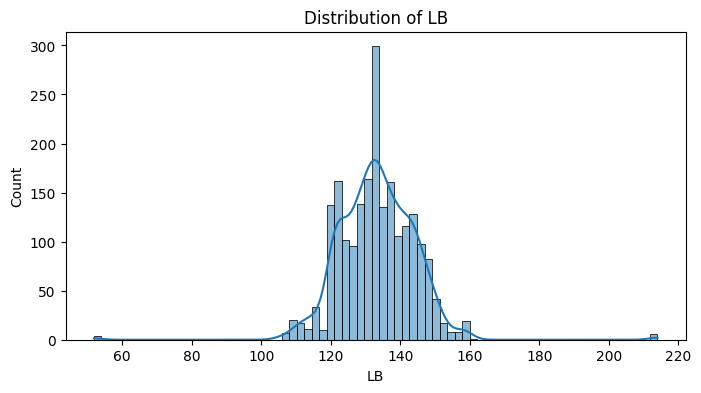

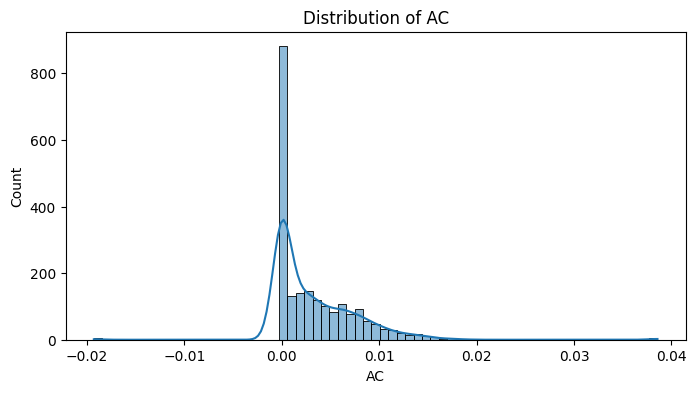

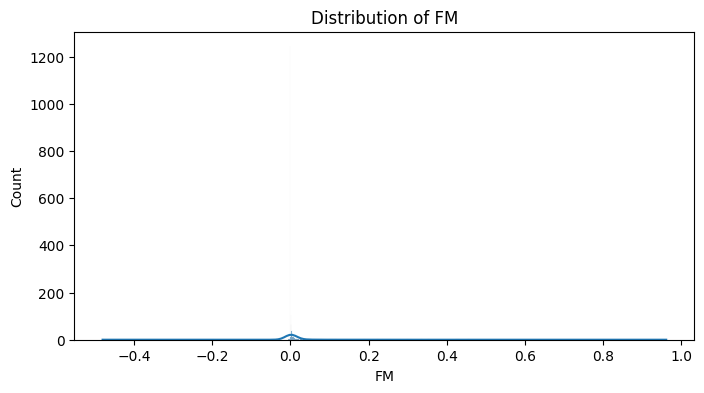

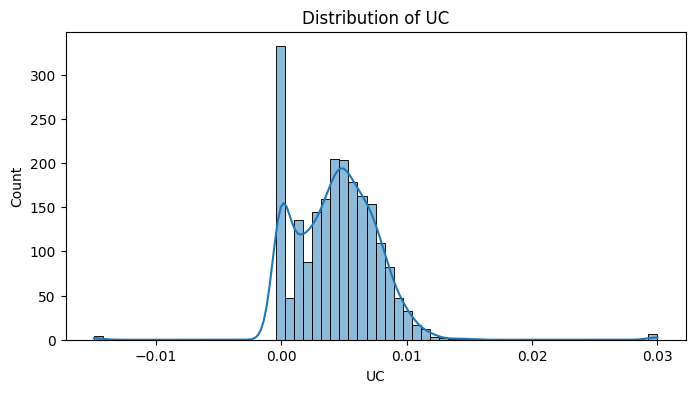

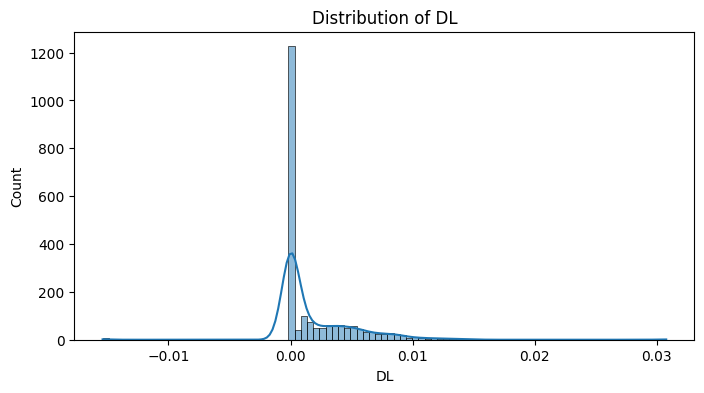

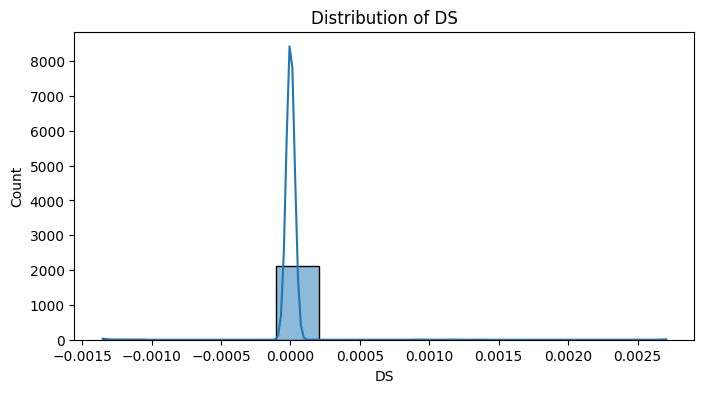

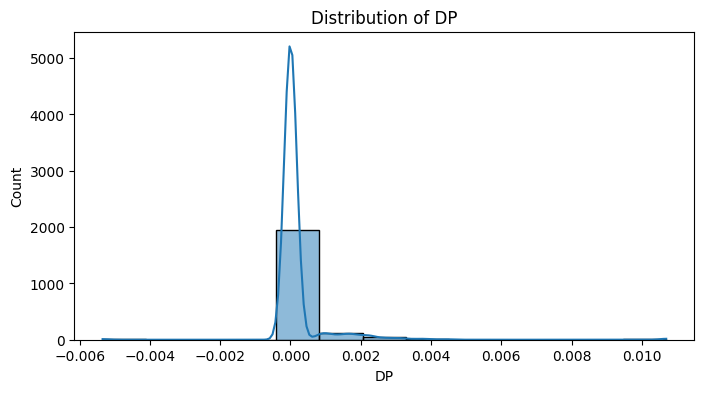

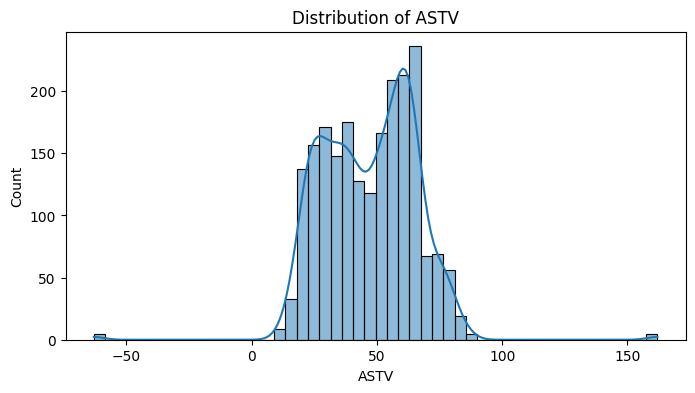

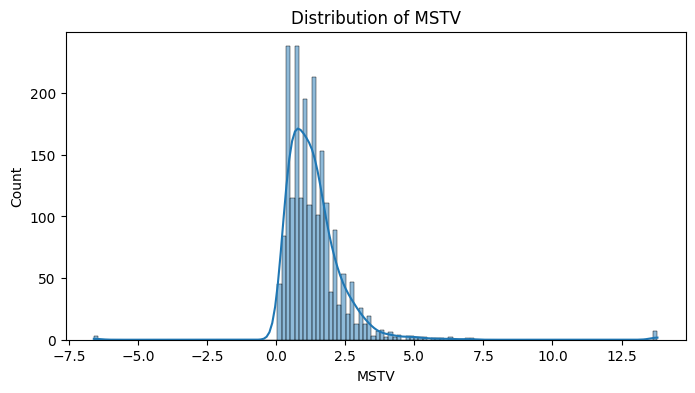

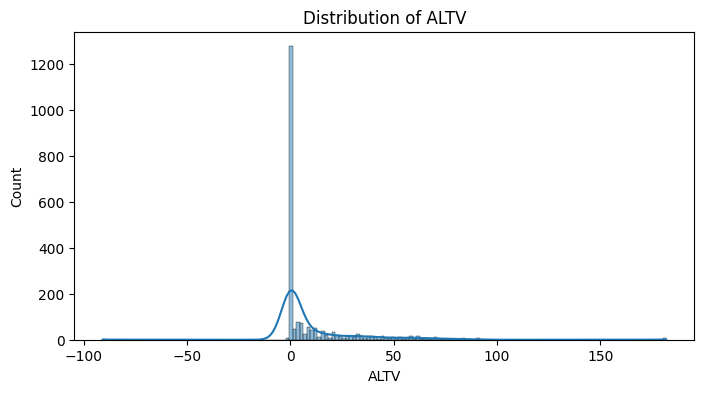

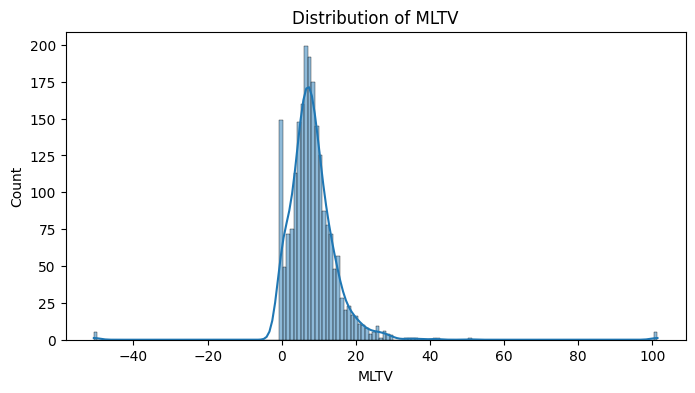

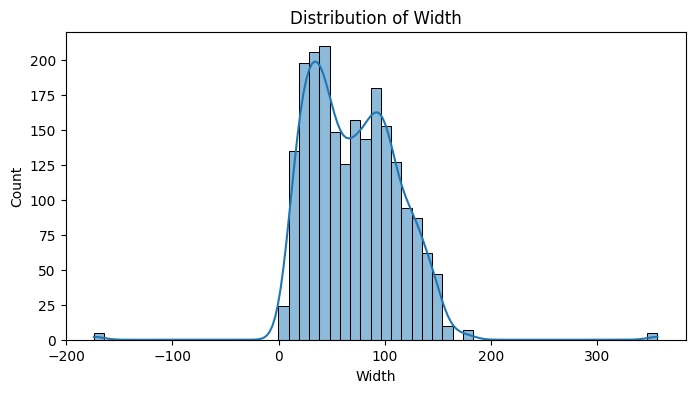

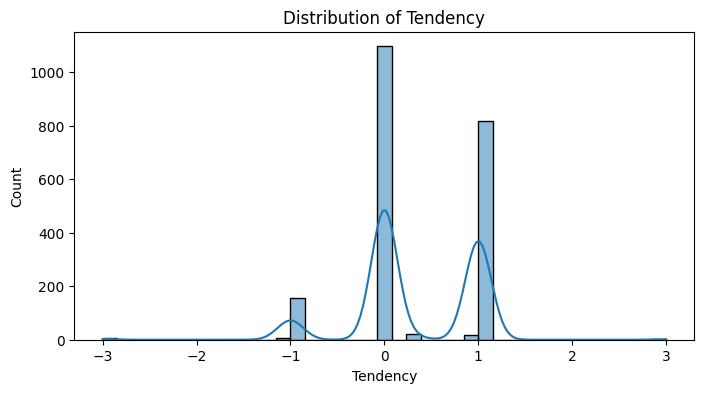

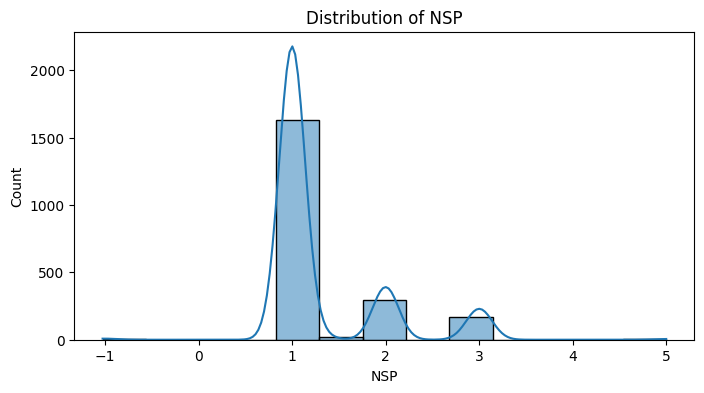

In [10]:
# Histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

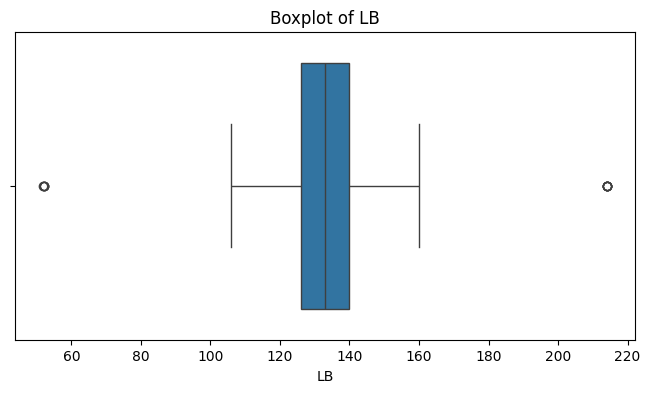

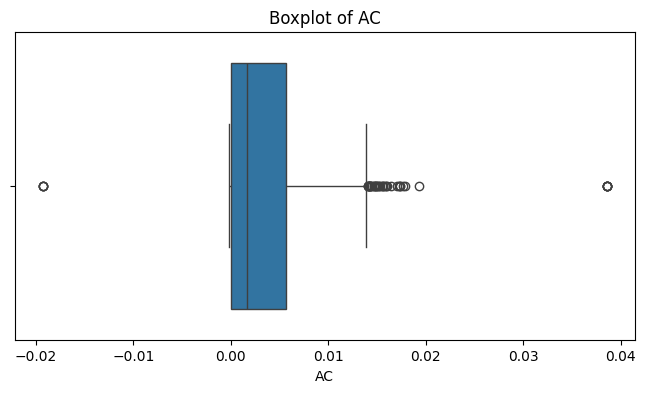

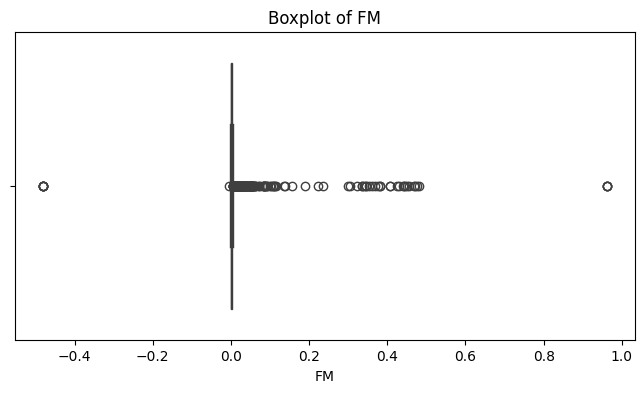

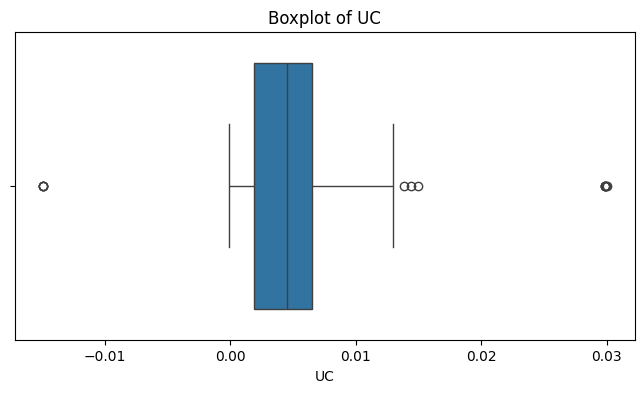

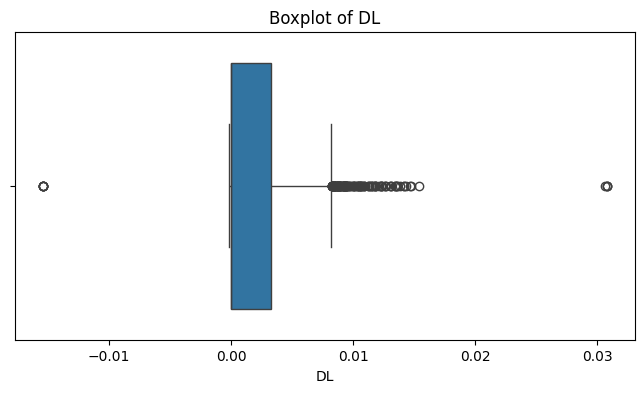

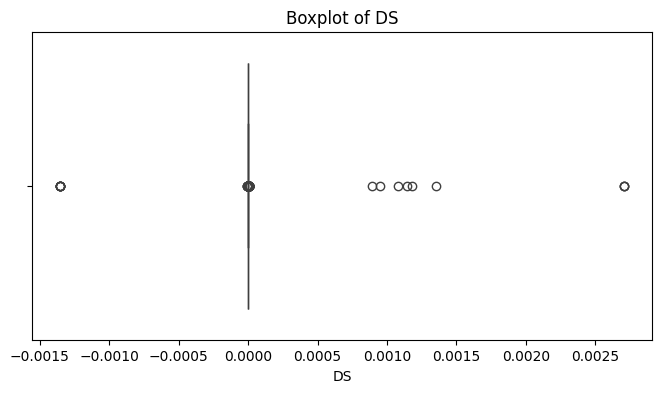

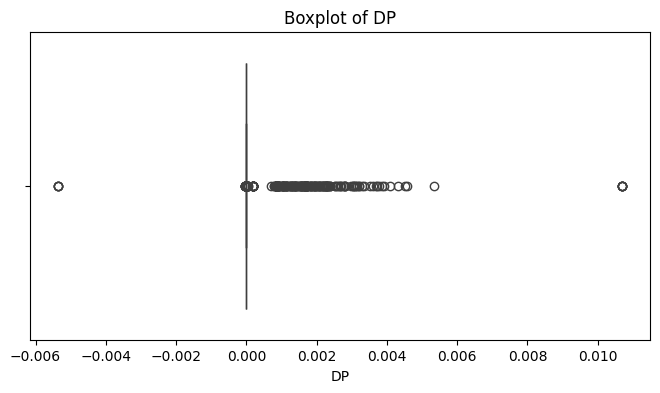

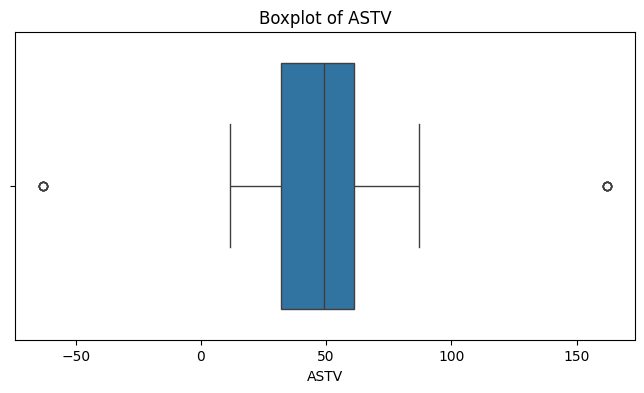

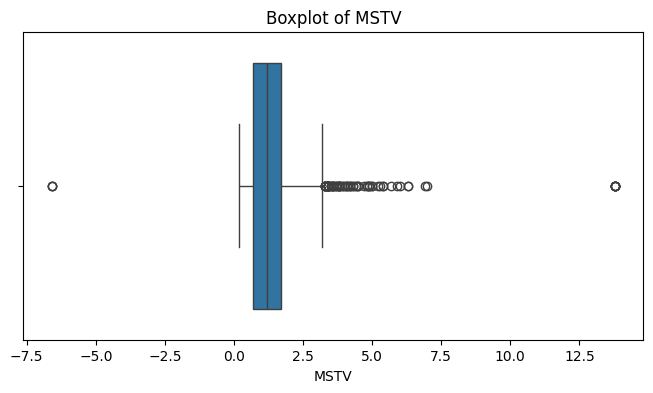

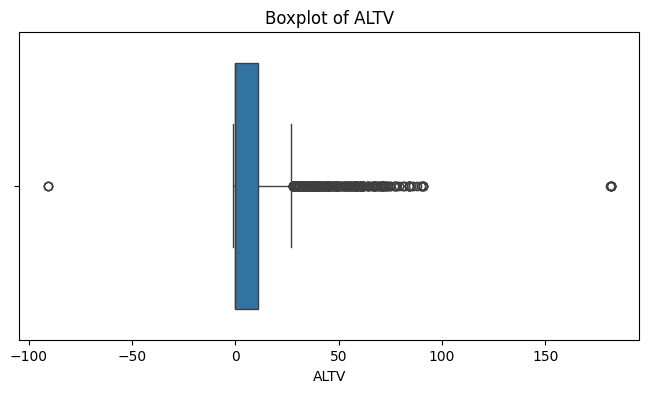

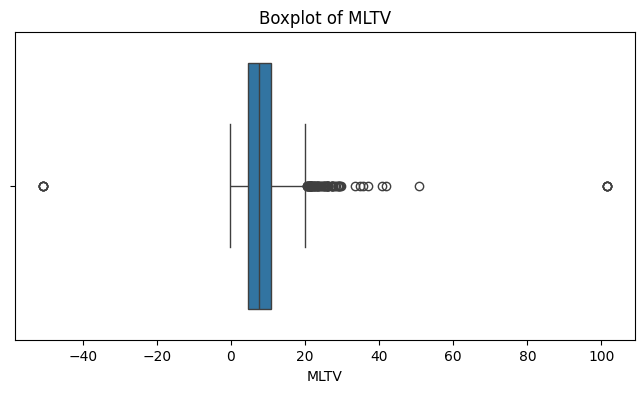

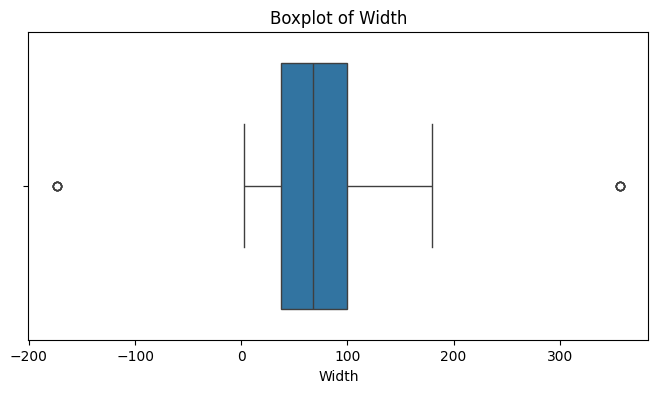

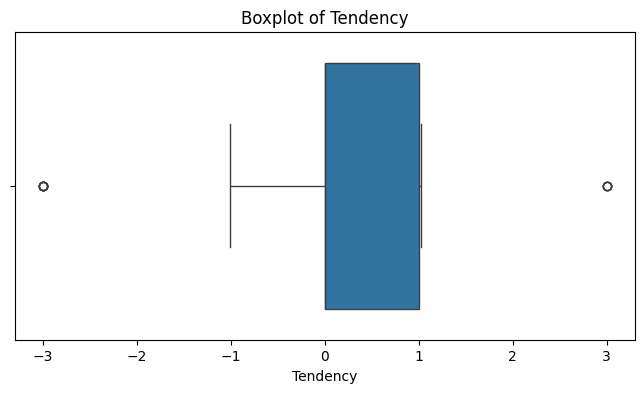

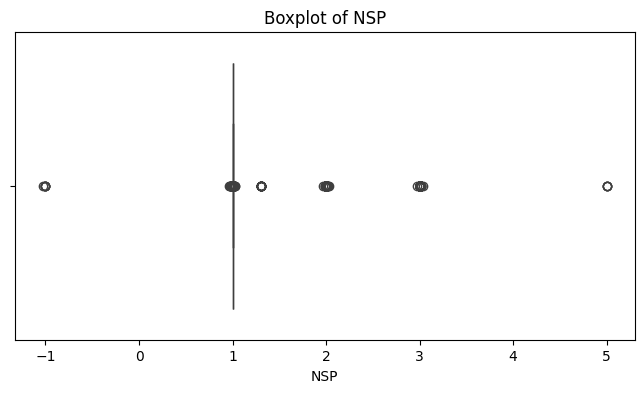

In [12]:
# Boxplots to check for outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

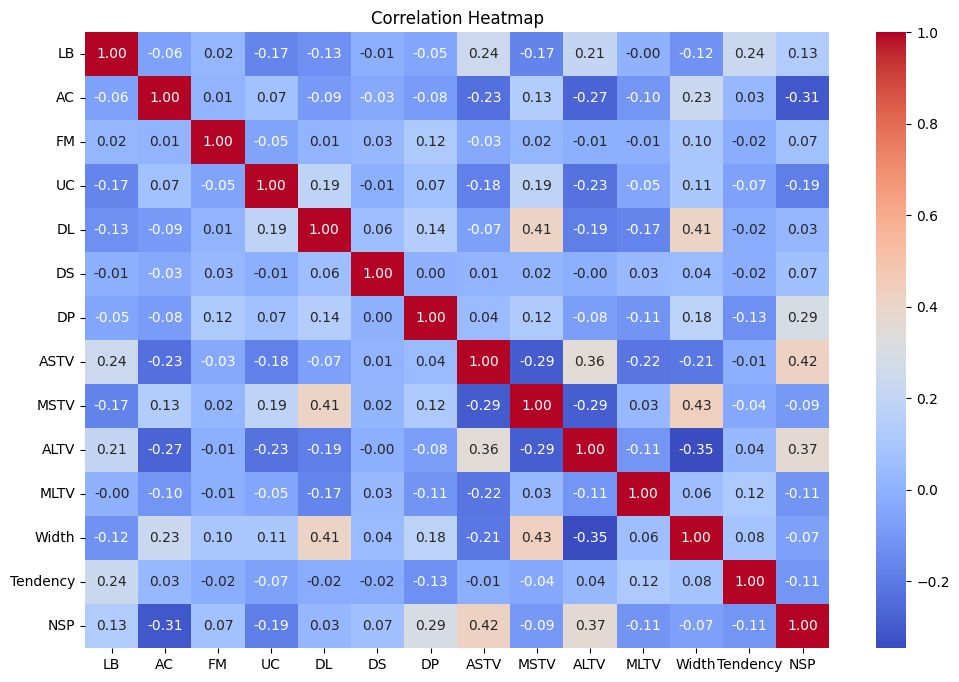

In [13]:
# Step 9: Correlation Analysis
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

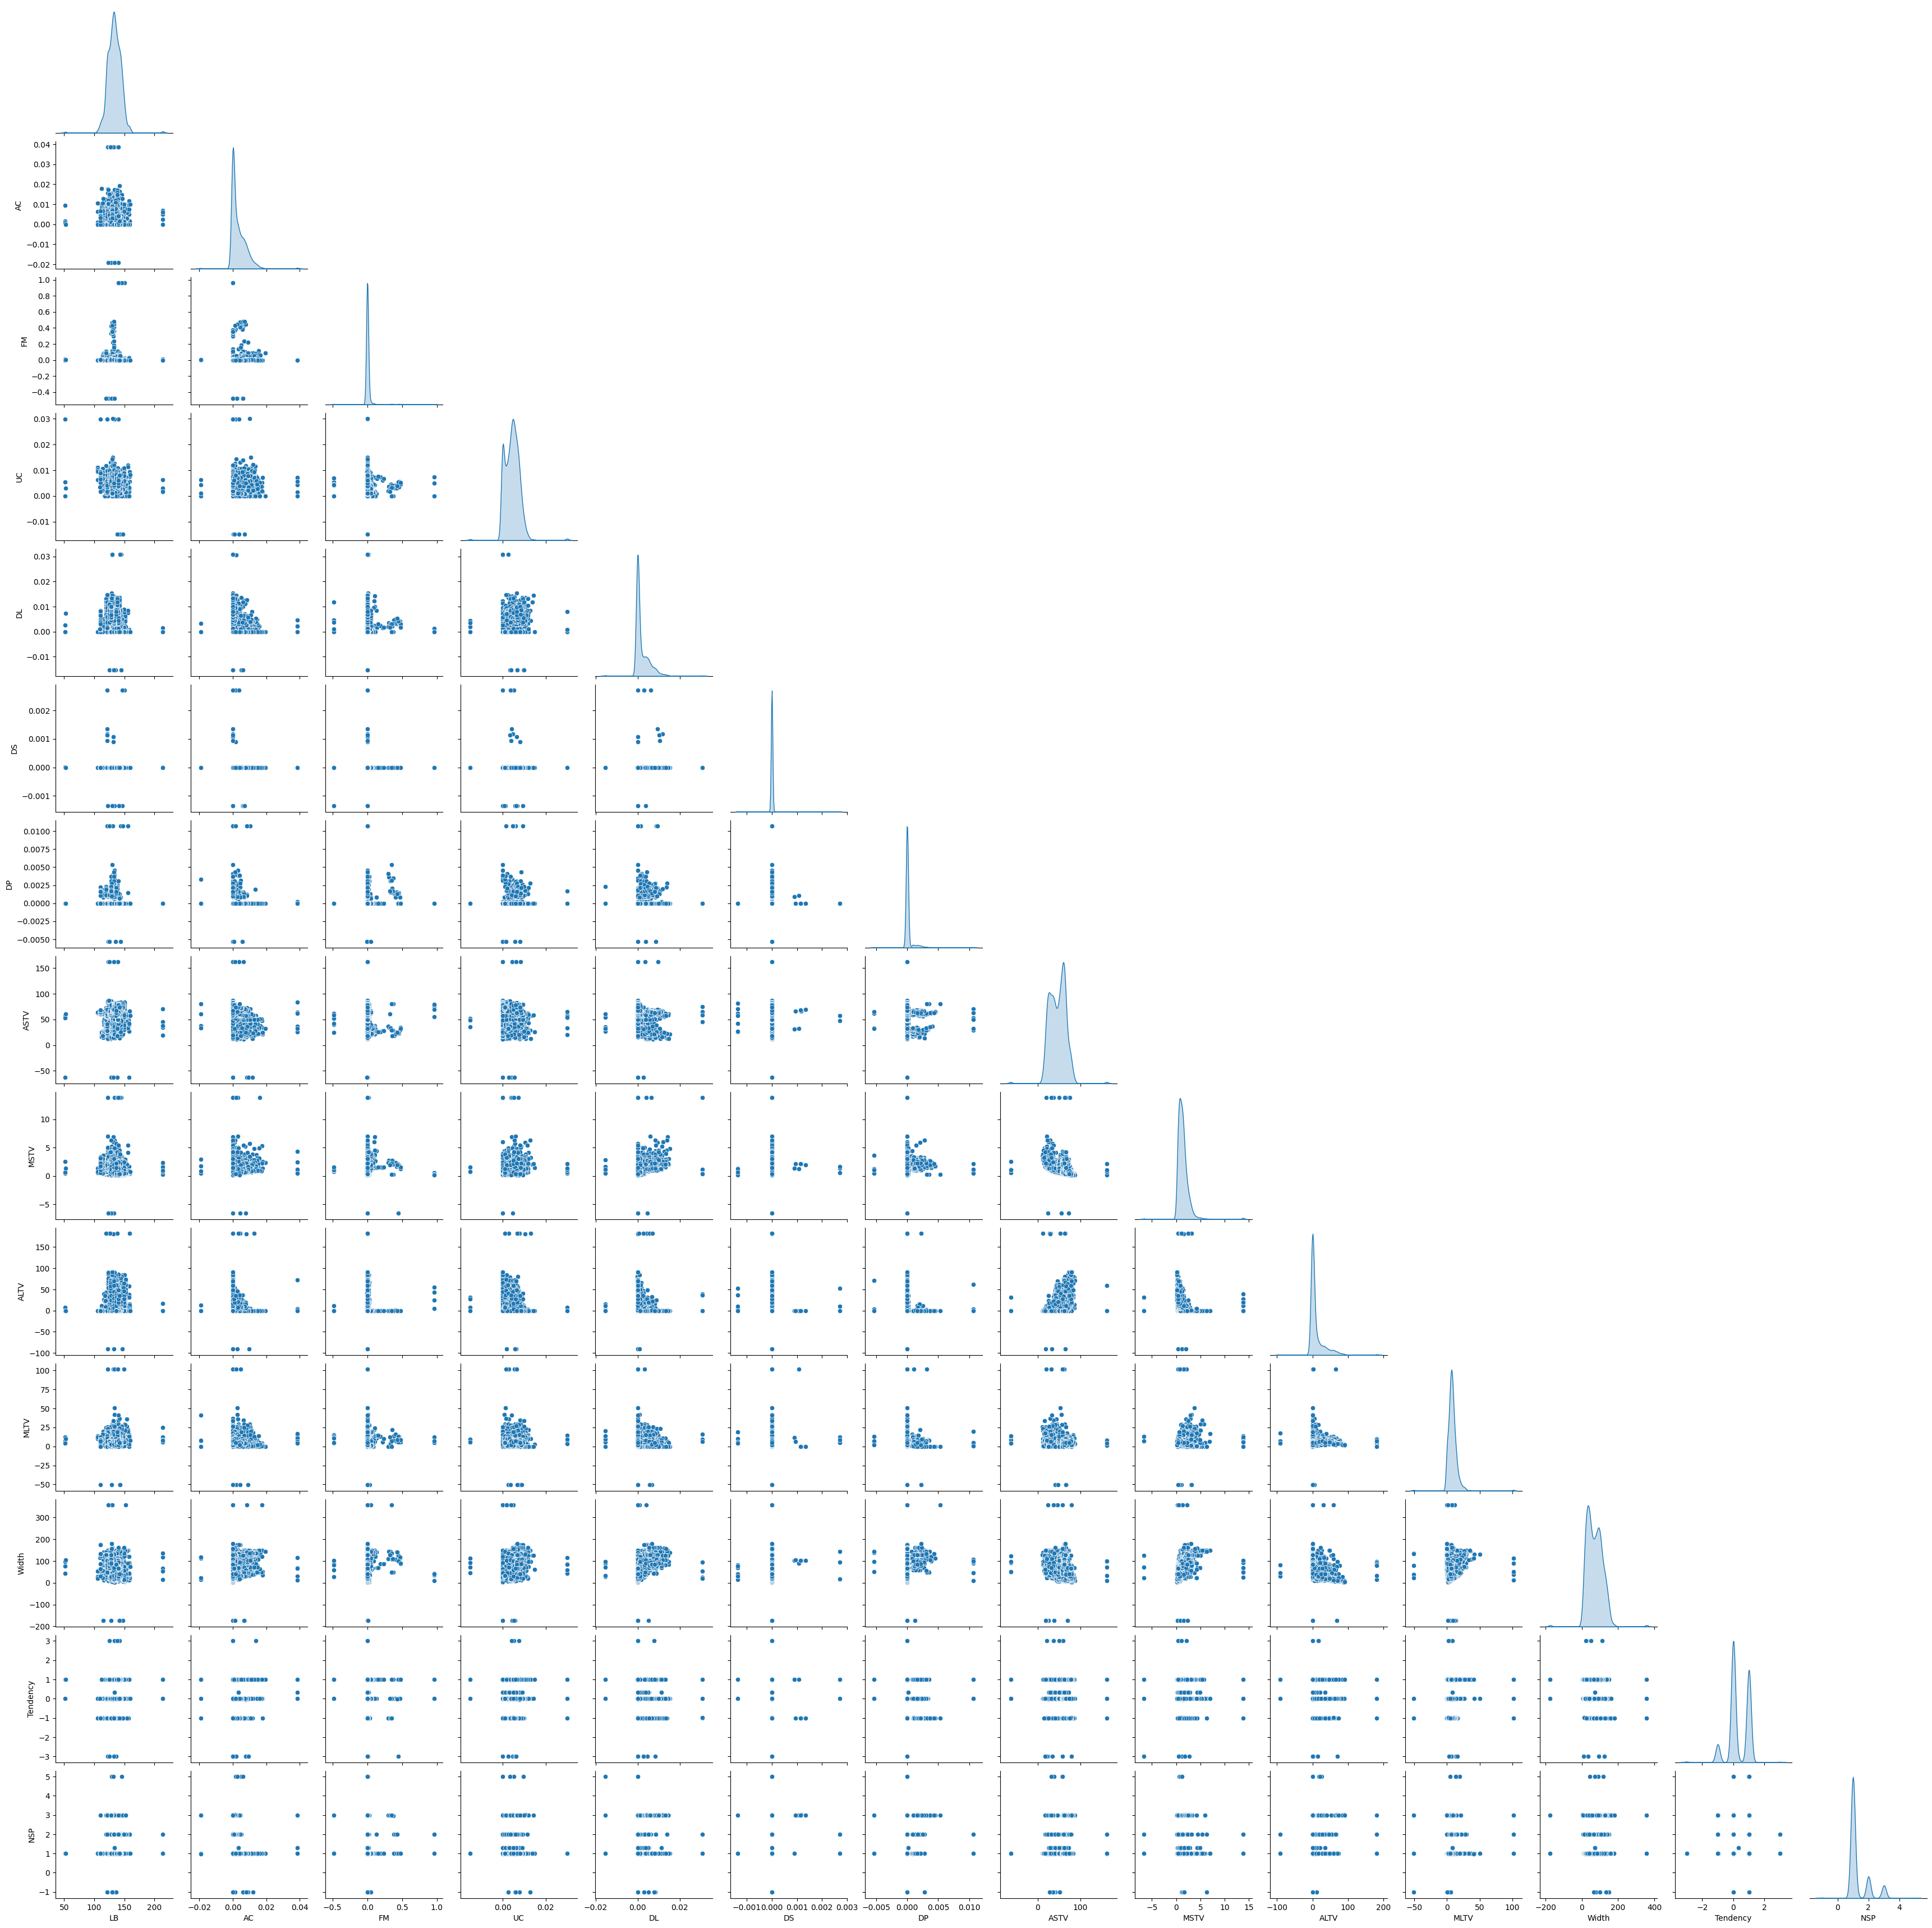

In [14]:
# Step 10: Scatter Plots for variable relationships
sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True)
plt.show()

In [15]:
# Step 11: Save Results (Optional)
# Save the cleaned dataset
output_file = "cleaned_cardiotocographic.csv"
df.to_csv(output_file, index=False)
print(f"Cleaned dataset saved as {output_file}")


Cleaned dataset saved as cleaned_cardiotocographic.csv
